## Table of Contents
* [Importing Libraries](#chapter0)
* [Importing Datasets](#chapter0.5)
* [Data Cleaning](#chapter1)
    * [Data Types](#section_1_1)
    * [Feature Exploration](#section_1_2)
    * [Handling Missing Values](#section_1_3)
    * [Outlier Detection](#section_1_4)
        * [Sub Section 1.1.1](#sub_section_1_1_1)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
        * [Sub Section 2.1.2](#sub_section_2_1_2)
    * [Section 2.2](#section_2_2)
        * [Sub Section 2.2.1](#sub_section_2_2_1)
        * [Sub Section 2.2.2](#sub_section_2_2_2)
* [Chapter 3](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
        * [Sub Section 3.1.2](#sub_section_3_1_2)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)
        * [Sub Section 3.2.2](#sub_section_3_2_2)

## Importing Libraries <a class="anchor" id="chapter0"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn import set_config
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = 100


## Importing Datasets <a class="anchor" id="chapter0.5"></a>

In [2]:
df = pd.read_csv("train.csv")
test=pd.read_csv('test.csv')
#test_c=test

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

## Data Cleaning <a class="anchor" id="chapter1"></a>

In [ ]:
print('Data Dimensions for Train Data:')
print('   Number of Records:', df.shape[0])
print('   Number of Features:', df.shape[1])

### Data Types <a class="anchor" id="section_1_1"></a>

In [ ]:
display(df.dtypes)

### Feature Exploration <a class="anchor" id="section_1_2"></a>

In [2]:
print('Feature Names:')
print(df.columns)

Feature Names:


NameError: name 'df' is not defined

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,20))
plt.show()

NameError: name 'df' is not defined

### Handling Missing Values: No Missing Values <a class="anchor" id="section_1_3">

### Outlier Detection <a class="anchor" id="section_1_4"></a>

In [4]:
def outlier_function(dff, col_name):
    
    first_quartile = np.percentile(np.array(dff[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(dff[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in dff[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [13]:
# loop through all columns to see if there are any outliers
for column in df.columns:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

here we are going to take a closer look for the outlier elimination for the following columns:

Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Horizontal_Distance_To_Fire_Points

We are not considering other columns for potential outlier elimination because their data range is already fixed between 0 and 255 (e.g. Hillsahde columns) or they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas).

Recalling the data ranges of those 4 columns:

Horizontal_Distance_To_Hydrology: 0, 1343
Vertical_Distance_To_Hydrology: -146, 554
Horizontal_Distance_To_Roadways: 0, 6890
Horizaontal_Distance_To_Firepoints: 0, 6993
    
Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, I am going to remove outliers only from that column.    

## Checking the Distribution of the Target variables

C:\Users\uSUARIO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


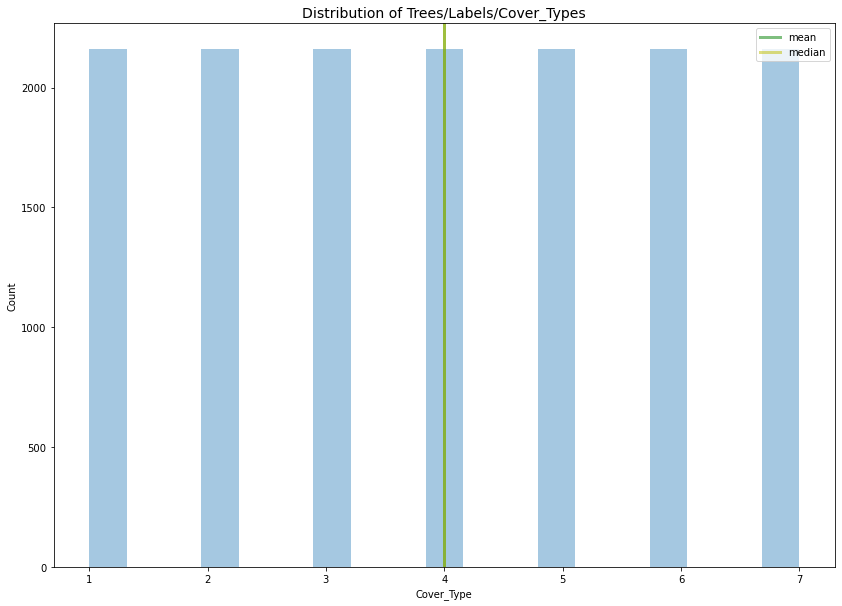

In [14]:
# set the plot size
plt.figure(figsize=(14,10))


# set the histogram, mean and median
sns.distplot(df["Cover_Type"], kde=False)
plt.axvline(df["Cover_Type"].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(df["Cover_Type"].median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

print('The training data set that we will use for the model building is evenly distributed across the seven cover types')

## Findings from Understand, Clean and Format Data

Training dataset has 15120 entries and 56 columns with headers appropriately named. Dataset is clean and well-formatted, meaning it had no NA values and every column has a numeric (float or integer) data type.

4 columns had outliers, outliers of the Horizontal_Distance_To_Fire_Points is removed considering this column has a wider range and has the most number of outliers.

Cover_Type is our label/target column. Wilderness_Area and Soil_Type columns might have binary values (0,1) if so, they are the one-hot-encoded columns of 4 wilderness areas and 40 soil types respectively. I am going to start exploratory data analysis by seeking answer to that suspicion.

## 2. Exploratory Data Analysis


Checking if Wilderness_Area and Soil_Type columns have only binary values

In [15]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in df.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(df[is_binary_columns].values.ravel())

array([1, 0], dtype=int64)

Yes, they only have binary values.

## Can one Cover Type belong to multiple soil types and wilderness areas ?

In [16]:
# sum of all widerness area columns for train set
df["w_sum"] = df["Wilderness_Area1"] + df["Wilderness_Area2"] + df["Wilderness_Area3"] + df["Wilderness_Area4"]
print(df.w_sum.value_counts())

1    15120
Name: w_sum, dtype: int64


In [17]:
# sum of all widerness area columns for test file
test["w_sum"] = test["Wilderness_Area1"] + test["Wilderness_Area2"] + test["Wilderness_Area3"] + test["Wilderness_Area4"]
print(test.w_sum.value_counts())

1    565892
Name: w_sum, dtype: int64


In [18]:
# create a list of soil_type columns for train set
soil_columns = [c for c in df.columns if "Soil" in c]
df["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    df["soil_sum"] += df[c]

print(df.soil_sum.value_counts())

1    15120
Name: soil_sum, dtype: int64


In [19]:
df.drop(columns=["w_sum", "soil_sum"], inplace=True)

In [20]:
# create a list of soil_type columns for test file
soil_columns = [c for c in test.columns if "Soil" in c]
test["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    test["soil_sum"] += test[c]

print(test.soil_sum.value_counts())

1    565892
Name: soil_sum, dtype: int64


In [21]:
test.drop(columns=["w_sum", "soil_sum"], inplace=True)

In [22]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

Wilderness_Area and Soil_Type1-40 having only binary values and only one soil_type or wilderness_area being equal to 1, shows that they are one-hot-encoded columns.

One important thing about cover type are, they can only belong to one soil type or one wilderness area.

Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas

In [ ]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
df_use['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
plt.figure(figsize=(14,10))

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = df[df.Wilderness_Area_Type == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)
# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

One of the other important finding: Wilderness area is an important feature to determine the cover type:

Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7) mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.
Note that, distribution of cover types extend more than the range because of the kernel density estimation.

Wilderness Area 3 is more diverse in soil type and cover type.
Only soil types 1 through 20 is represented in Wilderss Area 4, thus cover types in that area grew with them.
Cover type 7 seems to grow with soil types 25 through 40.
Cover Type 5 and 6 can grow with most of the soil types.
Cover Type 3 loves soil type 0 through 15.
Cover Type 1 and 2 can grow with any soil type.

### Visualize some collinear features with Cover_Type

In [ ]:
plt.figure(figsize=(14,10))

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

In [ ]:
plt.figure(figsize=(24,10))

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

One of the features from the Hillshade_9am or Hillshade_3pm or Hillshade_Noon will be dropped when determining the training set. for that we can use be determined after looking at the Pearson Coeffiecients with the label.

### Pearson Coefficients of all features

In [ ]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

Distributions:

Hillshade_9am and Hillshade_Noon has bi-modal and left-skewed distributions.
Horizontal_Distance_To_Firepoints, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Hydrology has bi-modal and right-skewed distributions.
Elevation resembles a uniform distribution.
Slope, Vertical_Distance_To_Hydrology, Hillshade_3pm shows a symmetric and bi-modal distribution.
Some obvious relationships between the continuous features:

Elevation and shows positive trend with following variables:
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Horizontal_Distance_To_Firepoints
Horizontal_Distance_To_Hydrology
As Aspect increases; Hillshade_Noon and Hillshade_3pm increases.
Slope has negative trend with:
Elevation
Horizontal_Distance_To_Roadways
Hillshade_9am, Hillshade_Noon and Hillshade_3pm
Horizontal_Distance_To_Firepoints
Horizontal_Distance_To_Hydrology has positive trend with:
Horizontal_Distance_To_Firepoints
Horizontal_Distance_To_Roadways
Vertical_Distance_To_Hydrology
Vertical_Distance_To_Hydrology - Slope and Vertical_Distance_To_Hydrology - Horizontal_Distance_To_Hydrology has obvious collinear relationship.
As Horizontal_Distance_To_Roadways increases, Horizontal_Distance_To_Firepoints increases and Slope decreases.
Hillshade_9am shows negative trend with Hillshade_3pm and Aspect, as Hillshade_9am increases Elevation increases.
Hillshade_Noon has positive trend with:
Elevation
Aspect
Horizontal_Distance_To_Roadways
Hillshade_3pm
Horizontal_Distance_To_Firepoints
Hillshade_3pm shows perfect negative relationship with Hillshade_9am and perfect positive relationship with Hillshade_Noon.

None of the features are significantly different effect on determining the label cover type.

One interesting finding though, Soil Type 7 and 15 columns are blank in the heatmap, thus zero effect on determining the label Cover_Type.

Approximately 5 (1 percent of all soil types) soil_type columns affects the cover type.

Can we get a better picture if we use soil_type as one numeric column rather than seperate one-hot-encoded columns?

## Pearson coefficients with numeric Soil_Type representation

In [ ]:
df_use = df
test_use =test

In [ ]:
def reverse_one_hot_encode(x):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    x['String_Column'] = (x.iloc[:,x.columns.get_loc('Soil_Type1'):x.columns.get_loc('Soil_Type40')+1] == 1).idxmax(1)
    x['Tuple_Column'] = x['String_Column'].apply(split_numbers_chars)
    x['Soil_Type'] = x['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    x.drop(columns=['String_Column','Tuple_Column'], inplace=True)
    x['Soil_Type']=x['Soil_Type'].astype('category')
    x = x.drop(x.iloc[:,x.columns.get_loc('Soil_Type1'):x.columns.get_loc('Soil_Type40')+1],axis = 1)
    return x;

In [ ]:
reverse_one_hot_encode(df_use);
reverse_one_hot_encode(test_use);


In [ ]:
continuous_variables = df_use.columns[1:11].tolist()

# Create one column as Wilderness_Area_Type and represent it as categorical data in test file
test_use['Wilderness_Area_Type'] = (test_use.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(test_use['Wilderness_Area_Type'].value_counts().index.tolist())


In [ ]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
df_w_numeric_soil = df_use[all_features_w_label]

# pearson coefficients with numeric soil type column

correlations = pd.DataFrame(df_w_numeric_soil.corr())

figsize=(40,20)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=15)


## Findings From Exploratory Data Analysis


Data set have balanced labels, resulting in equal number of cover types. This will be an advantage when it comes to apply classification ML models because, the model will have good chance to learn patterns of all labels, eliminating the probability of underfitting.

Different wilderness areas consist of some specific cover type. Interestingly, Cottonwood/Willow, specifically likes to grow in wilderness area 4. While cover types 1, 2, 5 and 6 can grow in any soil type, other cover types grows more with specific soil types.

Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. With that way, there is a stronger correlation between soil type and Cover_Type. Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1].

Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type. Thus this column will be dropped in Part 3 for better interpretability of the future model.

In [ ]:
df.columns
#### Hillshade noon and 3pm high collinearity, one will be dropped

In [ ]:
df = pd.read_csv("train.csv")


## Feature Engineering

### Feature transformation

In [ ]:
## Euclidean Distance Function
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail
def reverse_one_hot_encode(x):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    x['String_Column'] = (x.iloc[:,x.columns.get_loc('Soil_Type1'):x.columns.get_loc('Soil_Type40')+1] == 1).idxmax(1)
    x['Tuple_Column'] = x['String_Column'].apply(split_numbers_chars)
    x['Soil_Type'] = x['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    x.drop(columns=['String_Column','Tuple_Column'], inplace=True)
    x['Soil_Type']=x['Soil_Type'].astype('category')
    x = x.drop(x.iloc[:,x.columns.get_loc('Soil_Type1'):x.columns.get_loc('Soil_Type40')+1],axis = 1)
    return x;
def Euc_distance(x):
    a = np.power(x['Horizontal_Distance_To_Hydrology'],2)
    b = np.power(x['Vertical_Distance_To_Hydrology'],2)
    x['Euclidean_Distance_To_Hydrology'] = np.sqrt(a + b)
    return x;
## Euclidean Distance Function
def Direction_Aspect(x):
    aspect_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    interval = np.linspace(11.25, 371.25, 17)
    interval[0] = 0
    ## Segment and sort into bins using pd cuts
    x['Aspect_Direction'] = pd.cut(x['Aspect']+11.25, interval, right=True, labels=aspect_labels, ordered=False)
    return x;
### Obtaining avg distances for numerical variables(vertical)
def mean_vertical(x):
    a ='Vertical_Distance_To_Hydrology'
    b ='Elevation'
    x['avg_hydro_elev'] = (x[a]+x[b])/2
    return x;
### Obtaining avg distances for numerical variables (horizontal)
def mean_horizontal(x):
    a ='Horizontal_Distance_To_Hydrology'
    b ='Horizontal_Distance_To_Roadways'
    c='Horizontal_Distance_To_Fire_Points'
    x['avg_hydro_fire'] = (x[a]+x[c])/2
    x['avg_hydro_road'] = (x[a]+x[b])/2
    x['avg_road_fire'] = (x[b]+x[c])/2
    return x;
def log_transform(x):
    x['Horizontal_Distance_To_Hydrology_log']=[np.log(i) if i>=1 else i for i in np.log(x['Horizontal_Distance_To_Hydrology'])]
    x['Horizontal_Distance_To_Roadways_log']=[np.log(i) if i>=1 else i for i in np.log(x['Horizontal_Distance_To_Roadways'])]
    x['Horizontal_Distance_To_Fire_Points_log']=np.log(x['Horizontal_Distance_To_Fire_Points'])
    #x['Vertical_Distance_To_Hydrology_log']=np.log(x['Vertical_Distance_To_Hydrology'])
    #x['Elevation_log']=np.log(x['Elevation'])
    x['Euclidean_Distance_To_Hydrology_log']=np.log(x['Euclidean_Distance_To_Hydrology'])
    return x;

def root_transform(x):
    x['Horizontal_Distance_To_Hydrology_root']=np.sqrt(x['Horizontal_Distance_To_Hydrology'])
    x['Horizontal_Distance_To_Roadways_root']=np.sqrt(x['Horizontal_Distance_To_Roadways'])
    x['Horizontal_Distance_To_Fire_Points_root']=np.sqrt(x['Horizontal_Distance_To_Fire_Points'])
    #x['Vertical_Distance_To_Hydrology_log']=np.sqrt(x['Vertical_Distance_To_Hydrology'])
    #x['Elevation_root']=np.sqrt(x['Elevation'])
    x['Euclidean_Distance_To_Hydrology_root']=np.sqrt(x['Euclidean_Distance_To_Hydrology'])

    return x;

In [ ]:
df = Euc_distance(df)
df = Direction_Aspect(df)
df = mean_vertical(df)
df = mean_horizontal(df)
#df = log_transform(df)
df = root_transform(df)
df = reverse_one_hot_encode(df)
df.head()

In [ ]:
df.columns

## Building the Pipeline

In [ ]:
ohe_cats=['Aspect_Direction']
target_encoding_cats=['Soil_Type']


In [ ]:
num_pipeline = Pipeline(steps=[
    ('target', TargetEncoder())
])
cat_pipeline = Pipeline(steps=[
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

col_transformer = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,target_encoding_cats),
    ('cat_pipeline',cat_pipeline,ohe_cats)
    ],
    remainder='passthrough',
    n_jobs=-1)


from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [300, 500, 600, 800],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}
np.random.seed(42)

clf = RandomForestClassifier()
model= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)

# model = RandomForestRegressor(random_state=0)
model_pipeline = Pipeline(steps=[
    ('col_trans', col_transformer),
    ('model', model)
])


set_config(display='diagram')
display(model_pipeline)

In [ ]:
y = df['Cover_Type']
x = df.drop("Cover_Type",axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
df.columns

In [ ]:
model_pipeline.fit(X_train, y_train);
#mean_absolute_percentage_error(y_test, y_preds), mean_absolute_error(y_test, y_preds)

In [ ]:
test = Euc_distance(test)
test = Direction_Aspect(test)
test = mean_vertical(test)
test = mean_horizontal(test)
test = root_transform(test)
test = reverse_one_hot_encode(test)
test.head()

In [ ]:
y_preds=pd.Series(model_pipeline.predict(test))
y_preds.head()

In [ ]:
model_0_pred= pd.Series(y_preds)
test_id=pd.Series(test.Id)
result = pd.DataFrame({'Id':test_id, 'Cover_Type':model_0_pred})
result.set_index('Id', inplace = True)
result.to_csv('prediction_model0.csv')#,sep=',', float_format='%.0f')

In [ ]:
model.best_estimator_## best estimators for random forest regressor
#RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=4,
#                       n_estimators=800)

In [ ]:
model_pipeline.score(X_test, y_test)

## Extra trees classifier

In [ ]:
##Score: 0.75238 


In [ ]:
## Model After grid search
model = ExtraTreesClassifier(max_features=None, min_samples_leaf=2, min_samples_split=6,
                     n_estimators=900, random_state=2022)
#No need to run grid search again, but if you do want to run it, erase the ''' on top and bottom
# and comment the model variable on top with #
'''
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators': [600,700,800,900,1000,1100,1200,1300,1400,1500],
                       'min_samples_leaf': [1,2,3,4],
                       'min_samples_split': [5,6,7,8, 9, 10, 11, 12],
                       'max_features': ['auto', 'sqrt', 'log2', None]}
np.random.seed(42)

clf = ExtraTreesClassifier(random_state=2022)
model= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=20,scoring = 'accuracy',
                          cv=5,
                          verbose=2,random_state=2022)

'''

model_pipeline = Pipeline(steps=[
    ('col_trans', col_transformer),
    ('model', model)
])


set_config(display='diagram')
display(model_pipeline)

In [ ]:
model_pipeline.fit(X_train, y_train);

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test = Euc_distance(test)
test = Direction_Aspect(test)
test = mean_vertical(test)
test = mean_horizontal(test)
test = root_transform(test)
test = reverse_one_hot_encode(test)
test.head()

In [ ]:
y_preds=pd.Series(model_pipeline.predict(test))
y_preds.head()

In [ ]:
model_1_pred= pd.Series(y_preds)
test_id=pd.Series(test.Id)
result = pd.DataFrame({'Id':test_id, 'Cover_Type':model_1_pred})
result.set_index('Id', inplace = True)
result.to_csv('prediction_model1.csv')#,sep=',', float_format='%.0f')

## Extra Trees Classifier + Outlier Removal

In [ ]:
## Importing Train set
df = pd.read_csv('train.csv')

In [ ]:
## Transforming train set
df = Euc_distance(df)
df = Direction_Aspect(df)
df = mean_vertical(df)
df = mean_horizontal(df)
#df = log_transform(df)
df = root_transform(df)
df = reverse_one_hot_encode(df)
df.head()

In [ ]:
## defining outlier function
def outlier_function(dff, col_name):
    
    first_quartile = np.percentile(np.array(dff[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(dff[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in dff[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [ ]:
## Removing outliers
df = df[(df['Horizontal_Distance_To_Fire_Points'] > outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[1])]
df.shape

In [ ]:
## defining x and y previous to split
y = df['Cover_Type']
x = df.drop("Cover_Type",axis=1)


In [ ]:
## Splitting train and test within train set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
## defining pipeline
model = ExtraTreesClassifier(max_features=None, min_samples_leaf=2, min_samples_split=6,
                     n_estimators=900, random_state=2022)
#No need to run grid search again, but if you do want to run it, erase the ''' on top and bottom
# and comment the model variable on top with #


'''
grid = {'n_estimators': [600,700,800,900,1000,1100,1200,1300,1400,1500],
                       'min_samples_leaf': [1,2,3,4],
                       'min_samples_split': [5,6,7,8, 9, 10, 11, 12],
                       'max_features': ['auto', 'sqrt', 'log2', None]}
np.random.seed(42)

clf = ExtraTreesClassifier(random_state=2022)
model= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=20,scoring = 'accuracy',
                          cv=5,
                          verbose=2,random_state=2022)
'''

# model = RandomForestRegressor(random_state=0)
model_pipeline = Pipeline(steps=[
    ('col_trans', col_transformer),
    ('model',model)
])


set_config(display='diagram')
display(model_pipeline)

In [ ]:
## training pipeline
model_pipeline.fit(X_train, y_train);

In [ ]:
#defining test set
test = pd.read_csv('test.csv')

In [ ]:
#applying transformations to test set
test = Euc_distance(test)
test = Direction_Aspect(test)
test = mean_vertical(test)
test = mean_horizontal(test)
test = root_transform(test)
test = reverse_one_hot_encode(test)


In [ ]:
## predictions
y_preds=pd.Series(model_pipeline.predict(test))

In [ ]:
## exporting csv with predictions
model_2_pred= pd.Series(y_preds)
test_id=pd.Series(test.Id)
result = pd.DataFrame({'Id':test_id, 'Cover_Type':model_2_pred})
result.set_index('Id', inplace = True)
result.to_csv('prediction_model2.csv')#,sep=',', float_format='%.0f')

In [ ]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier based on the coefficient values
    """
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_[0] # Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [ ]:
x_train_dummies, x_test_dummies, y_train_dummies, y_test_dummies = train_test_split(dummies, y, test_size=0.1,shuffle=True, random_state=2022)


In [ ]:
ridge_mod = LogisticRegression(max_iter=20000,penalty='l2')
print("Accuracy = {:.4}".format(np.mean(cross_val_score(ridge_mod, x_train_dummies, y_train_dummies, cv=5))))

In [ ]:
get_feature_importance(ridge_mod.fit(dummies,y), dummies.columns.get_level_values(0).tolist())


In [ ]:
from sklearn.feature_selection import SelectFromModel
alphas = 10**np.linspace(-1,-4,100)

ridge_mod_cv = LogisticRegressionCV(max_iter=18000,penalty='l2',Cs=alphas)
print("Accuracy = {:.4}".format(np.mean(cross_val_score(ridge_mod_cv, dummies, y, cv=5))))

## Chi_Squared

from sklearn.feature_selection import SelectKBest, chi2

# Apply ChiSquared to score the features based on the training data.
chi2_selector = SelectKBest(score_func=chi2).fit(dummified_hr_df,y)


# Sort the features according to the ChiSquared Scores
indices = np.argsort(chi2_selector.scores_)[::-1]

# Get the Features Names of the ordered Features
chi2_features = []
for i in range(len(dummified_hr_df.columns.get_level_values(0))):
    chi2_features.append(dummified_hr_df.columns.get_level_values(0)[indices[i]])

# Now plot
plt.figure(figsize=(10,10))
plt.yticks(rotation='horizontal',fontsize=16)
plt.barh(chi2_features, chi2_selector.scores_[indices[range(len(dummified_hr_df.columns.get_level_values(0)))]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()
